<a href="https://colab.research.google.com/github/ValentineKarimi/The-titanic-dataset-/blob/main/Naive_Bayes_Week_8_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Defining the Question
**a) Specifying the Question**

I have been recruited as an analyst to help provide the best model for prediction of spam and non spam messages by looking at the words in the message


**b) Defining the Metric for Success**

Find the optimal Naives Bayes model to best predict spam messages

**c) Understanding the context**

Using Naive Bayes in machine learning. Depending on the words , accuracy score and confusion matrix, a good set should be choosen, so it is easier to predict which kind of people survived 

**d) Recording the Experimental Design**

Reading and Checking the Data

Exploratory Analysis

Tidying the Dataset

Feature engineering 

Implementing the solution 

Challenging the solution 

Follow-up questions


**e) Data Relevance**


One dataset is provided by the  company:

The dataset and glossary to use for this project can be found here Datasets

## Reading data 

In [1]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition

In [2]:
#loading the data 
df = pd.read_csv('/content/spambase.data', names=( 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'))


In [3]:
# Previewing the top and bottom part of the dataset
display("The dataset preview")
display(df.head(3))
display(df.tail(3))

'The dataset preview'

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4598,0.30,0.0,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [4]:

# Check The number of records in  train dataset
print('The dataset has ',df.shape[0],'records and ', df.shape[1], 'rows' )

The dataset has  4601 records and  58 rows


In [5]:
#Find unique values of each dataset  
print(df.nunique())

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [6]:

# Checking whether each column has an appropriate datatype
#

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
# Find the unique values 
for column in df.columns:
  print(column)

  print(df[column].unique())
  print('\n')

word_freq_make
[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]


word_freq_address
[6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4.400e-01 9.400e-01 1.800e-01

## Tidying the dataset

In [8]:
# Identifying the Missing Data
#

df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

No missing values 

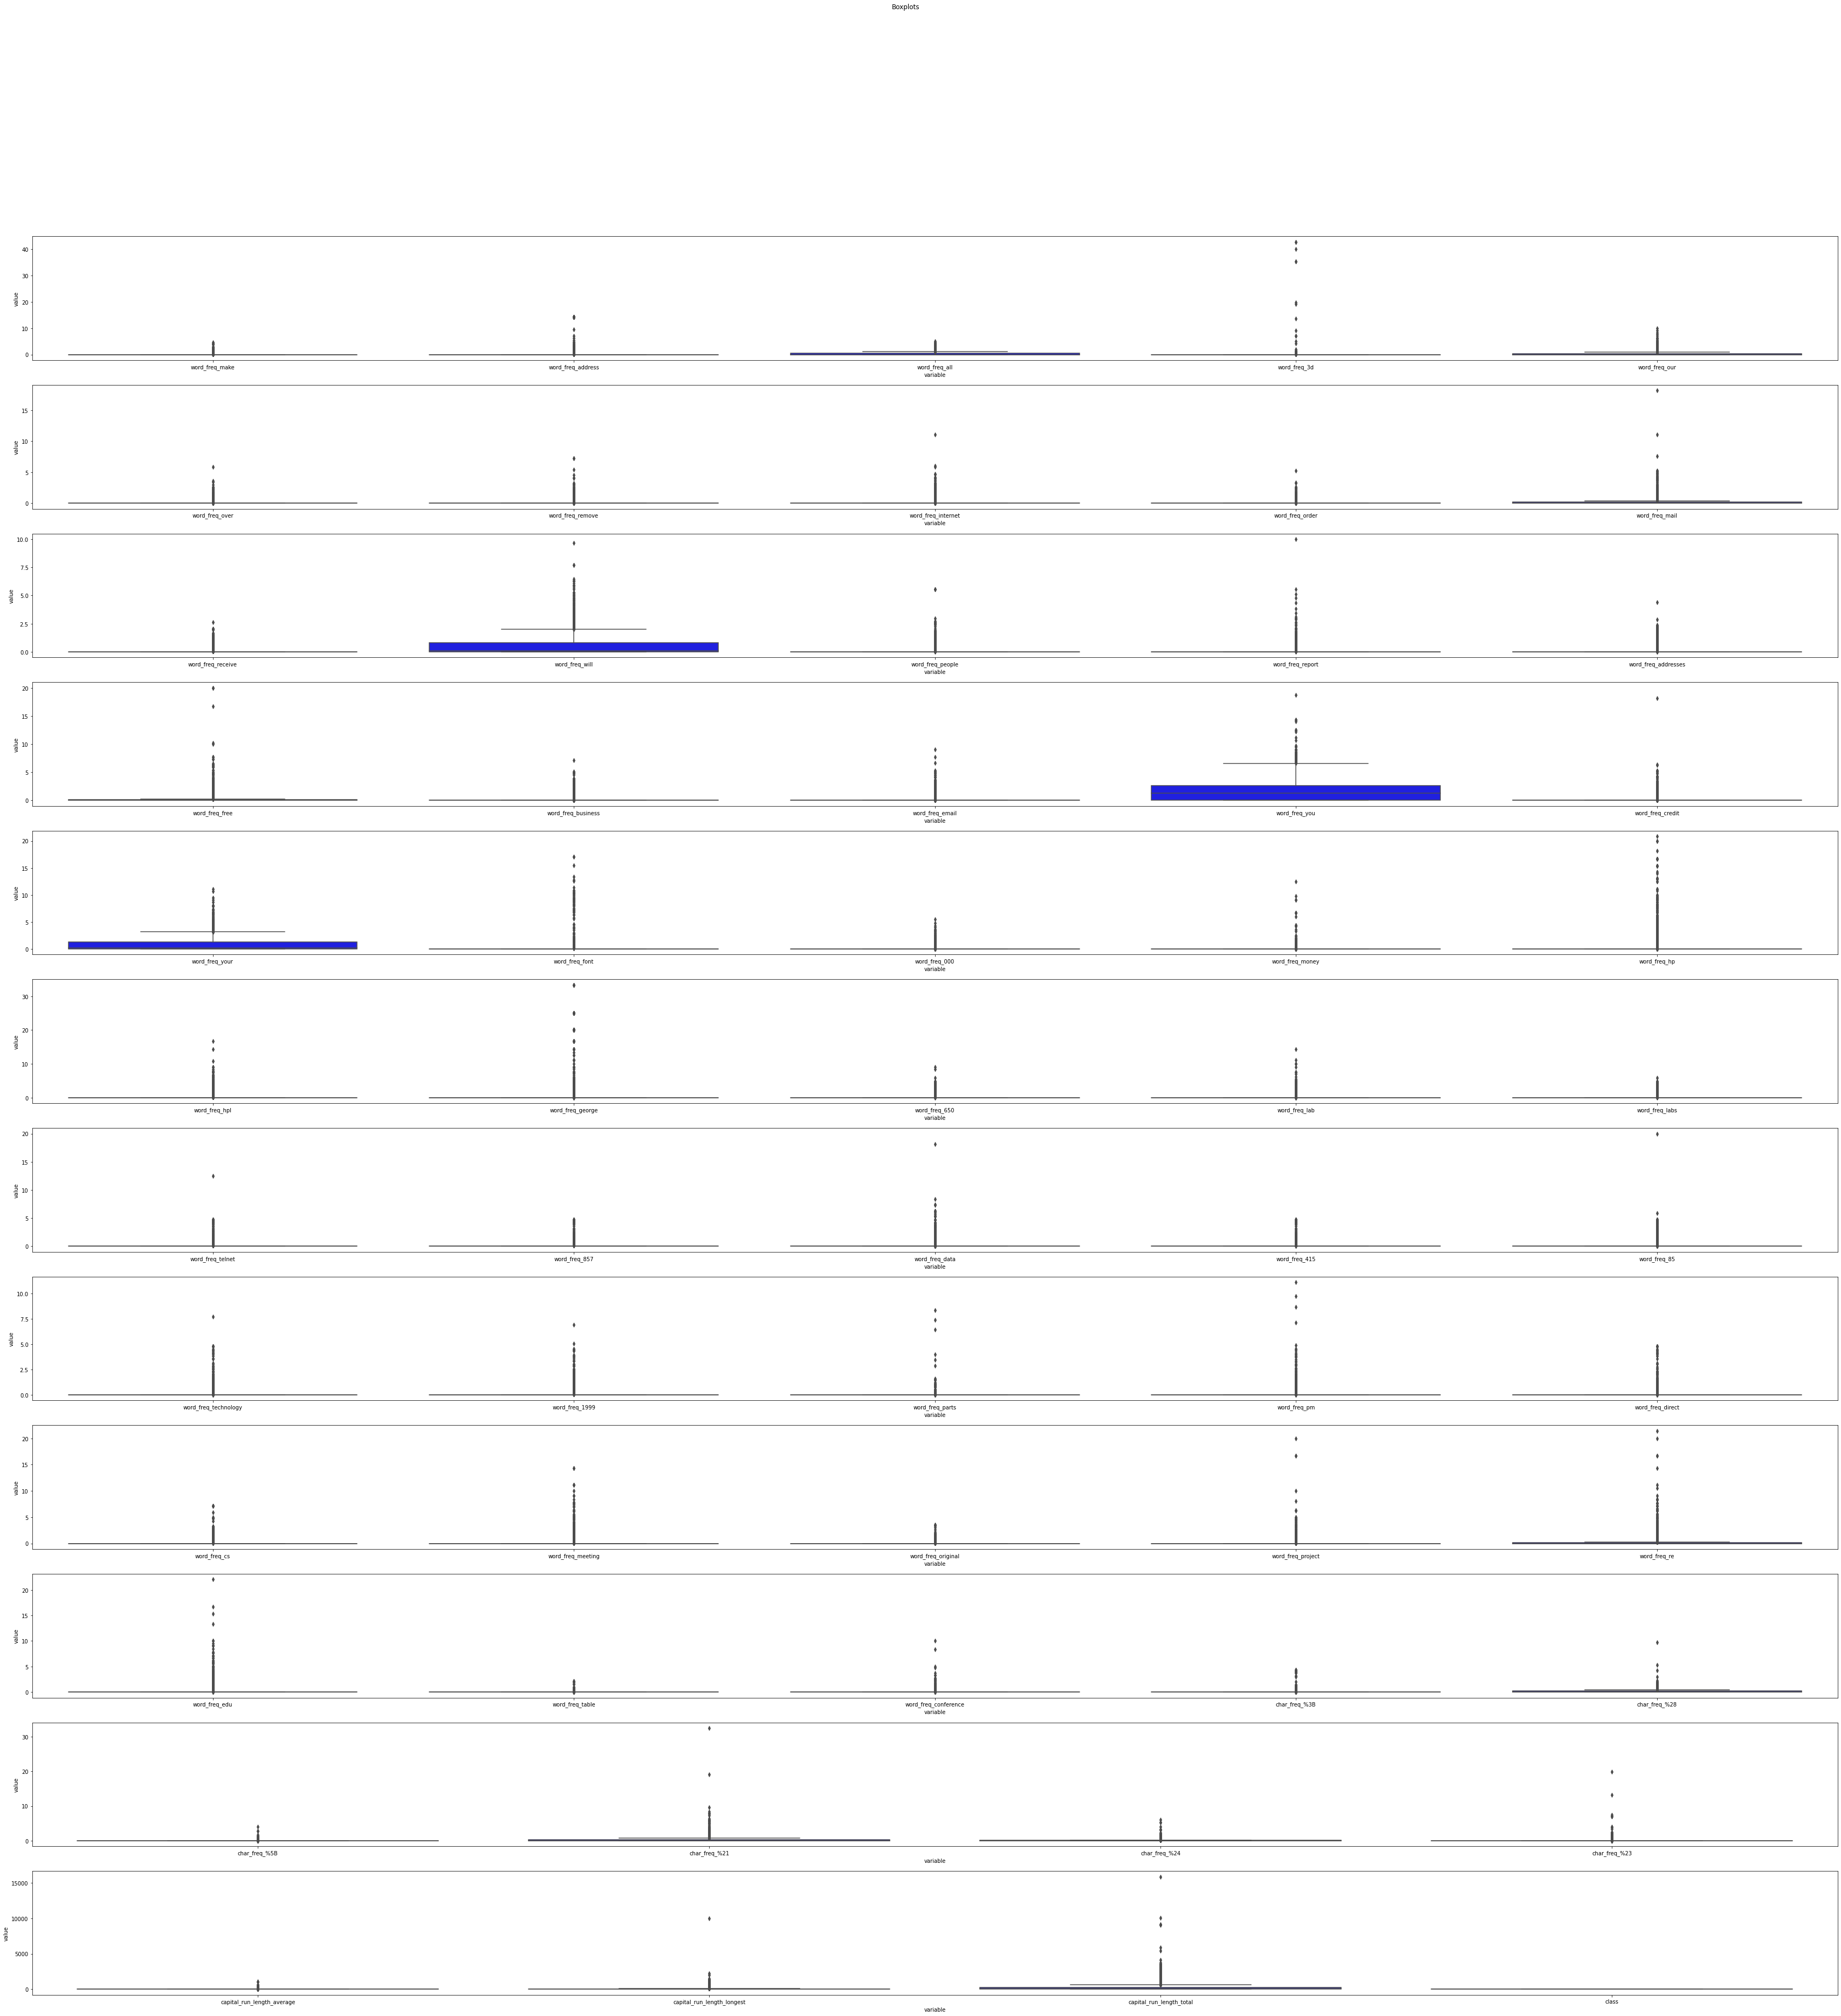

In [9]:
# Checking for Outliers
#
import seaborn as sns
import matplotlib.pyplot as plt


fig,((ax1,ax2, ax3,ax4,ax5,ax6, ax7, ax8,ax9,ax10,ax11,ax12))= plt.subplots(12,1, figsize=(60, 60))

fig.suptitle('Boxplots')

boxplot = pd.DataFrame(data =df, columns = [ 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our'])
boxplot1 = pd.DataFrame(data =df, columns = [ 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail'])

boxplot2 = pd.DataFrame(data =df, columns = [ 'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses'])

boxplot3 = pd.DataFrame(data =df, columns = [ 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit'])

boxplot4 = pd.DataFrame(data =df, columns = [ 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp'])

boxplot5 = pd.DataFrame(data =df, columns = [ 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs'])

boxplot6 = pd.DataFrame(data =df, columns = ['word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85'])

boxplot7 = pd.DataFrame(data =df, columns = ['word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct'])

boxplot8 = pd.DataFrame(data =df, columns = [ 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re'])

boxplot9 = pd.DataFrame(data =df, columns = ['word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28'])

boxplot10 =pd.DataFrame(data =df, columns = ['char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23'])

boxplot11 =pd.DataFrame(data =df, columns = ['capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'])
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue', ax=ax1)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot1), color = 'blue', ax=ax2)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot2), color = 'blue', ax=ax3)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot3), color = 'blue', ax=ax4)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot4), color = 'blue', ax=ax5)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot5), color = 'blue', ax=ax6)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot6), color = 'blue', ax=ax7)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot7), color = 'blue', ax=ax8)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot8), color = 'blue', ax=ax9)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot9), color = 'blue', ax=ax10)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot10), color = 'blue', ax=ax11)
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot11), color = 'blue', ax=ax12)

sns.set(font_scale=2)
plt.show()

too many outliers to be dropped 

In [10]:
# Checking for Anomalies for train data 
#
Q1= df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)


'0.25 quartile'

word_freq_make                 0.000
word_freq_address              0.000
word_freq_all                  0.000
word_freq_3d                   0.000
word_freq_our                  0.000
word_freq_over                 0.000
word_freq_remove               0.000
word_freq_internet             0.000
word_freq_order                0.000
word_freq_mail                 0.000
word_freq_receive              0.000
word_freq_will                 0.000
word_freq_people               0.000
word_freq_report               0.000
word_freq_addresses            0.000
word_freq_free                 0.000
word_freq_business             0.000
word_freq_email                0.000
word_freq_you                  0.000
word_freq_credit               0.000
word_freq_your                 0.000
word_freq_font                 0.000
word_freq_000                  0.000
word_freq_money                0.000
word_freq_hp                   0.000
word_freq_hpl                  0.000
word_freq_george               0.000
w

'0.75 quartile'

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.420
word_freq_3d                    0.000
word_freq_our                   0.380
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.160
word_freq_receive               0.000
word_freq_will                  0.800
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.100
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   2.640
word_freq_credit                0.000
word_freq_your                  1.270
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

'0.5 quartile'

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.420
word_freq_3d                    0.000
word_freq_our                   0.380
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.160
word_freq_receive               0.000
word_freq_will                  0.800
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.100
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   2.640
word_freq_credit                0.000
word_freq_your                  1.270
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

No column seems to have an anomaly value 

In [11]:
### lets now check for duplicates in our dataset
print(df.duplicated().value_counts())


False    4210
True      391
dtype: int64


In [12]:
# Dropping duplicates 
df.drop_duplicates()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


##Exploratory Analysis

Histogram of columns distribution 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


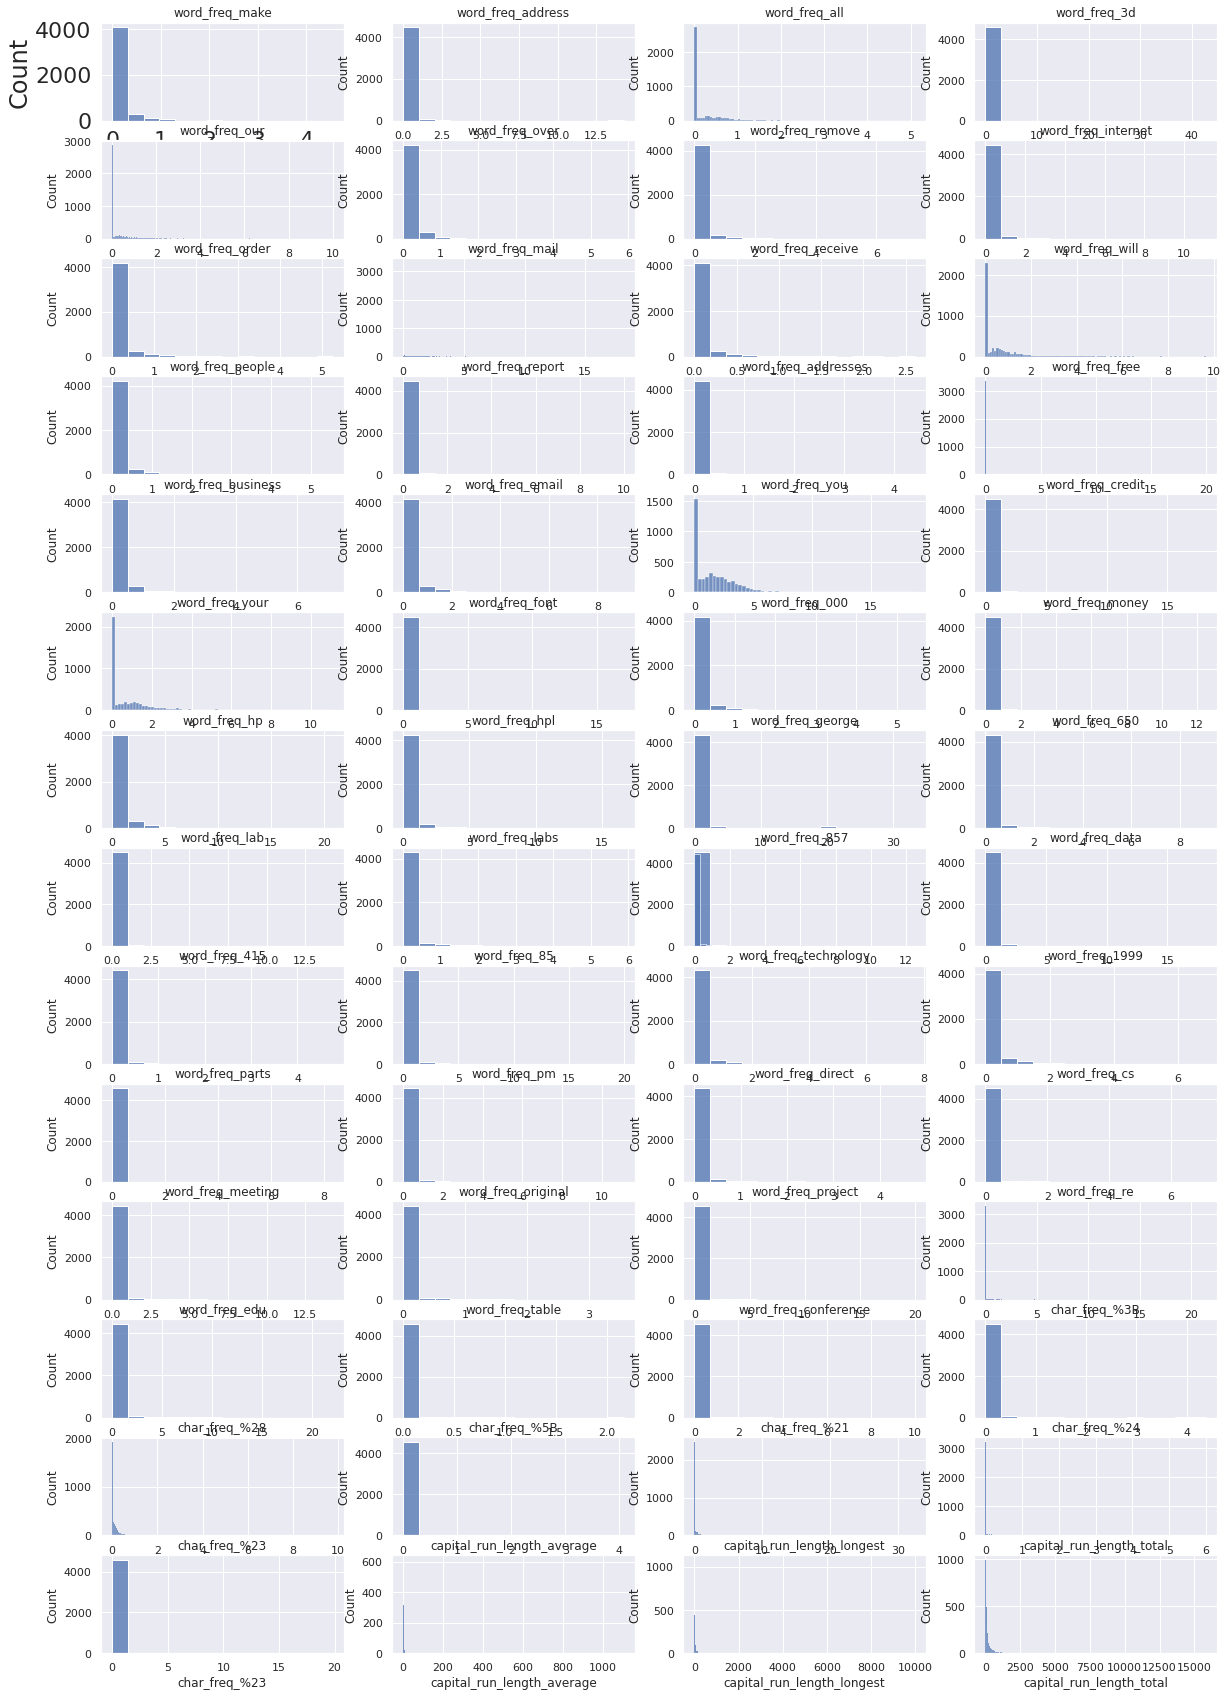

In [13]:
columns_dict={'word_freq_make': 1,'word_freq_address':2, 'word_freq_all':3, 'word_freq_3d':4,
       'word_freq_our':5, 'word_freq_over':6, 'word_freq_remove':7,
       'word_freq_internet':8, 'word_freq_order':9, 'word_freq_mail':10,
       'word_freq_receive':11, 'word_freq_will':12, 'word_freq_people':13,
       'word_freq_report':14, 'word_freq_addresses':15, 'word_freq_free':16,
       'word_freq_business':17, 'word_freq_email':18, 'word_freq_you':19,
       'word_freq_credit':20 , 'word_freq_your' :21, 'word_freq_font' : 22, 'word_freq_000' :23,
       'word_freq_money' :24, 'word_freq_hp' :25, 'word_freq_hpl' : 26, 'word_freq_george' : 27,
       'word_freq_650' : 28, 'word_freq_lab' :29, 'word_freq_labs' : 30, 'word_freq_telnet' :31,
       'word_freq_857' :31, 'word_freq_data' :32, 'word_freq_415' : 33, 'word_freq_85' : 34,
       'word_freq_technology' : 35, 'word_freq_1999' :36, 'word_freq_parts' :37,
       'word_freq_pm' : 38, 'word_freq_direct' : 39, 'word_freq_cs' : 40, 'word_freq_meeting' :41,
       'word_freq_original' : 42, 'word_freq_project' :43, 'word_freq_re' :44,
       'word_freq_edu' : 45, 'word_freq_table' : 46, 'word_freq_conference' : 47,
       'char_freq_%3B' : 48, 'char_freq_%28' : 49, 'char_freq_%5B' :50, 'char_freq_%21' : 51,
       'char_freq_%24' :52, 'char_freq_%23' : 53, 'capital_run_length_average' : 54,
       'capital_run_length_longest' : 55, 'capital_run_length_total': 56}

plt.figure(figsize=(20,30) )

# make a histogram plot for each variable column
for variable,i in columns_dict.items():
  plt.subplot(14,4,i)
  sns.histplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()

Most data look like counts starting from 0 hence multinomial might be best 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

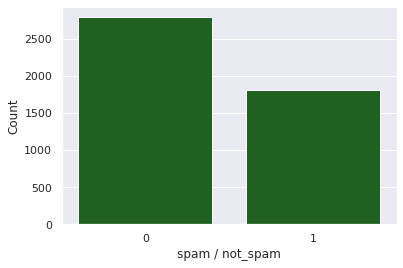

In [14]:
sns.countplot(df['class'], color='green',saturation=0.5)
plt.xlabel('spam / not_spam')
plt.ylabel('Count')

The class column shows that it id unbalanced data 

## Feature selection using random classifier 

In [15]:

#

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


X = df.iloc[ :, :-1].values
y = df['class'].values



In [16]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['class'])

In [17]:
features = df.iloc[:, :-1].columns

In [18]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, min_samples_split = 20, max_depth=4)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test)

In [19]:

# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_forest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_forest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))
#Getting the score
print(forest.score(X_test, y_test))

Mean Absolute Error: 0.16314101361671027
Mean Squared Error: 0.07784239064162057
Root Mean Squared Error: 0.2790024921781534
0.6740172631484006


The errors are quite low and its accuracy is above 65% hence we can proceed  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


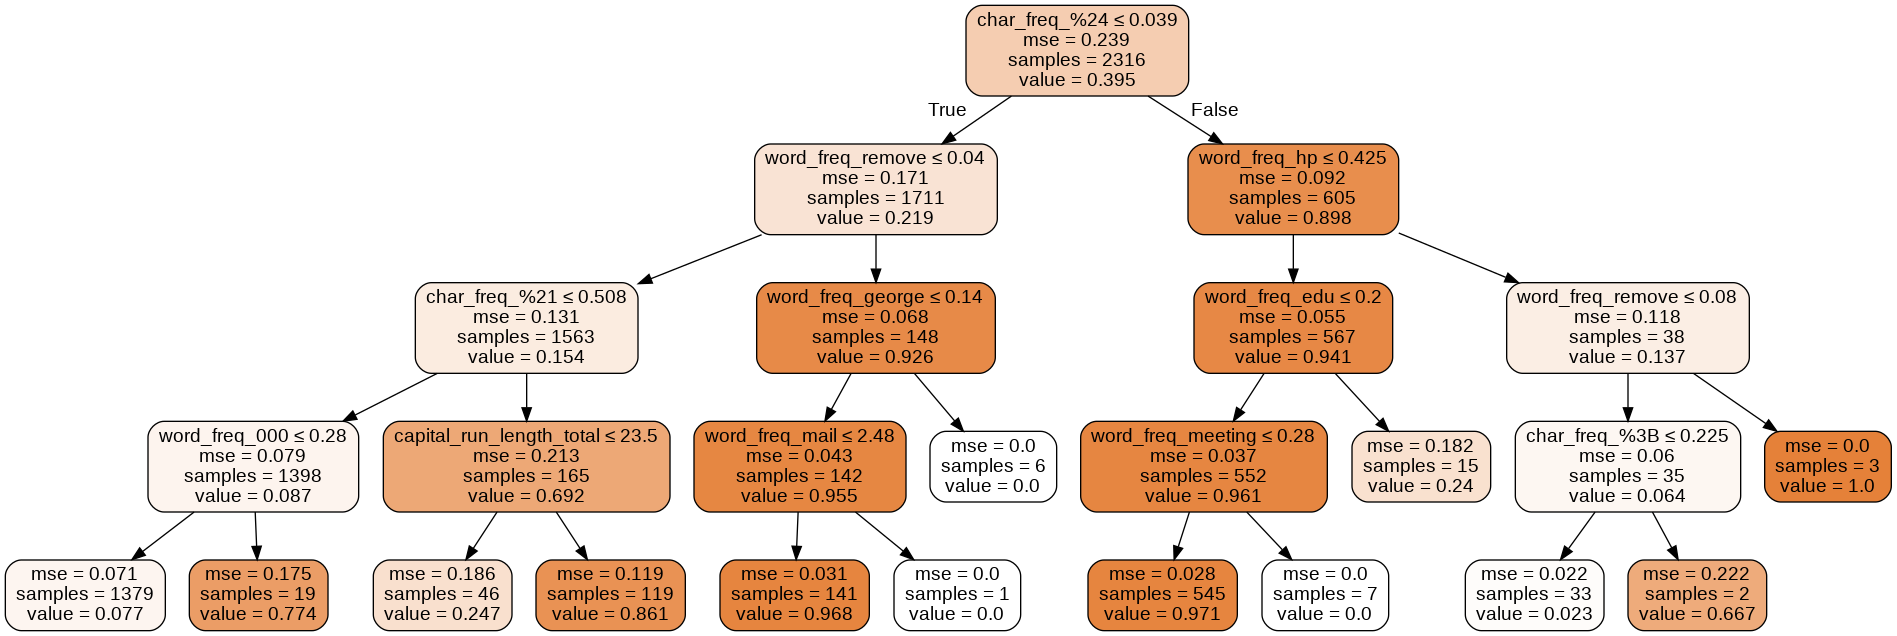

In [20]:

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [21]:
# Get numerical feature importances
importances = list(forest.feature_importances_)


#Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
importance_df1 = pd.DataFrame({'feature': features, 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)


In [22]:
#Get the fifteen best 
forestfeature = importance_df1.iloc[:15, :]

In [23]:
forestfeature.index

Index(['char_freq_%24', 'word_freq_remove', 'char_freq_%21', 'word_freq_hp',
       'capital_run_length_total', 'word_freq_free', 'word_freq_edu',
       'word_freq_george', 'capital_run_length_longest', 'word_freq_000',
       'capital_run_length_average', 'word_freq_money', 'word_freq_meeting',
       'word_freq_email', 'char_freq_%3B'],
      dtype='object', name='feature')

In [24]:
final=df[['char_freq_%24', 'word_freq_remove', 'char_freq_%21', 'word_freq_hp',
       'capital_run_length_total', 'word_freq_free', 'word_freq_edu',
       'word_freq_george', 'capital_run_length_longest',
       'capital_run_length_average', 'word_freq_000', 'word_freq_meeting',
       'word_freq_money', 'word_freq_email', 'word_freq_your']]
final.head()

,char_freq_%24,word_freq_remove,char_freq_%21,word_freq_hp,capital_run_length_total,word_freq_free,word_freq_edu,word_freq_george,capital_run_length_longest,capital_run_length_average,word_freq_000,word_freq_meeting,word_freq_money,word_freq_email,word_freq_your
0,0.000,0.00,0.778,0.0,278,0.32,0.00,0.0,61,3.756,0.00,0.0,0.00,1.29,0.96
1,0.180,0.21,0.372,0.0,1028,0.14,0.00,0.0,101,5.114,0.43,0.0,0.43,0.28,1.59
2,0.184,0.19,0.276,0.0,2259,0.06,0.06,0.0,485,9.821,1.16,0.0,0.06,1.03,0.51
3,0.000,0.31,0.137,0.0,191,0.31,0.00,0.0,40,3.537,0.00,0.0,0.00,0.00,0.31
4,0.000,0.31,0.135,0.0,191,0.31,0.00,0.0,40,3.537,0.00,0.0,0.00,0.00,0.31


## Implementing the solution 

In [25]:
X1 = final.values 
y = df['class'].values

**80-20 set**

Splitting the data 

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size=0.2, random_state=56, stratify = df['class'])

Training the models using Multinormal Naives bayes 

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf=  MultinomialNB()

In [28]:
model = clf.fit(X1_train, y1_train)

In [29]:
y_pred =  model.predict(X1_test)

In [30]:
print(np.mean(y_pred == y1_test))
print("Accuracy score:", metrics.accuracy_score(y1_test, y_pred))
print("F1 Score:", metrics.f1_score(y1_test, y_pred))
print("Classification Report::", metrics.classification_report(y1_test, y_pred))

0.7100977198697068
Accuracy score: 0.7100977198697068
F1 Score: 0.644474034620506
Classification Report::               precision    recall  f1-score   support

           0       0.77      0.74      0.76       558
           1       0.62      0.67      0.64       363

    accuracy                           0.71       921
   macro avg       0.70      0.70      0.70       921
weighted avg       0.71      0.71      0.71       921



In [31]:
# Constructing the confusion matrix.

confusion_matrix(y1_test, y_pred)

array([[412, 146],
       [121, 242]])

**70-30 set**

Splitting the data 

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1,y, test_size=0.3, random_state=56, stratify = df['class'])

training the model 

In [33]:
model = clf.fit(X2_train, y2_train)

making a prediction

In [34]:
y_pred1 =  model.predict(X2_test)

Accuracy

In [35]:
print(np.mean(y_pred1 == y2_test))
print("Accuracy score:", metrics.accuracy_score(y2_test, y_pred1))
print("F1 Score:", metrics.f1_score(y2_test, y_pred1))
print("Classification Report::", metrics.classification_report(y2_test, y_pred1))

0.724837074583635
Accuracy score: 0.724837074583635
F1 Score: 0.6631205673758865
Classification Report::               precision    recall  f1-score   support

           0       0.79      0.75      0.77       837
           1       0.64      0.69      0.66       544

    accuracy                           0.72      1381
   macro avg       0.71      0.72      0.72      1381
weighted avg       0.73      0.72      0.73      1381



Idrntify the values with right classification 

In [36]:
# Constructing the confusion matrix.

confusion_matrix(y2_test, y_pred1)

array([[627, 210],
       [170, 374]])

**60-40 set**

Splitting data 

In [37]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X1,y, test_size=0.4, random_state=56, stratify = df['class'])

Training data 

In [38]:
model = clf.fit(X3_train, y3_train)

making predictions 

In [39]:
y_pred2 =  model.predict(X3_test)

Finding accuracy 

In [40]:
print(np.mean(y_pred2 == y3_test))
print("Accuracy score:", metrics.accuracy_score(y3_test, y_pred2))
print("F1 Score:", metrics.f1_score(y3_test, y_pred2))
print("Classification Report::", metrics.classification_report(y3_test, y_pred2))

0.7251493753394894
Accuracy score: 0.7251493753394894
F1 Score: 0.6671052631578948
Classification Report::               precision    recall  f1-score   support

           0       0.79      0.74      0.77      1116
           1       0.64      0.70      0.67       725

    accuracy                           0.73      1841
   macro avg       0.71      0.72      0.72      1841
weighted avg       0.73      0.73      0.73      1841



In [41]:
# Constructing the confusion matrix.

confusion_matrix(y3_test, y_pred2)

array([[828, 288],
       [218, 507]])

## Challenging the solution 

trying to improve the performance of model 

In [42]:
final=df[['char_freq_%24', 'word_freq_remove', 'char_freq_%21', 'word_freq_hp',
       'capital_run_length_total', 'word_freq_free', 'word_freq_edu',
       'word_freq_george', 'capital_run_length_longest',
       'capital_run_length_average', 'word_freq_000', 'word_freq_meeting',
       'word_freq_money', 'word_freq_email', 'word_freq_your', 'class']]

In [43]:
# Removing outliers based on the IQR range and stores the result in the data frame 'final_'
# ---
# 
Q1= final.quantile(0.25)
Q3 = final.quantile(0.75)
IQR = Q3-Q1
IQR
#boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
final_out = final[~((final < (Q1 - 1.5 * IQR)) |(final> (Q3 + 1.5 * IQR))).any(axis=1)]
final_out.shape
# Printing the shape of our new dataset versus the old one 
# ---
# 
print(final_out.shape)
print(final.shape)

(769, 16)
(4601, 16)


In [47]:
final_out.head()

,char_freq_%24,word_freq_remove,char_freq_%21,word_freq_hp,capital_run_length_total,word_freq_free,word_freq_edu,word_freq_george,capital_run_length_longest,capital_run_length_average,word_freq_000,word_freq_meeting,word_freq_money,word_freq_email,word_freq_your,class
5,0.0,0.0,0.000,0.0,54,0.0,0.0,0.0,15,3.000,0.0,0.0,0.0,0.0,0.00,1
7,0.0,0.0,0.000,0.0,49,0.0,0.0,0.0,11,2.450,0.0,0.0,0.0,0.0,0.00,1
16,0.0,0.0,0.428,0.0,107,0.0,0.0,0.0,31,4.652,0.0,0.0,0.0,0.0,2.83,1
20,0.0,0.0,0.729,0.0,23,0.0,0.0,0.0,9,3.833,0.0,0.0,0.0,0.0,0.00,1
89,0.0,0.0,0.000,0.0,38,0.0,0.0,0.0,23,3.800,0.0,0.0,0.0,0.0,0.00,1


In [44]:
multinomal = MultinomialNB(alpha=5) # trying smoothing the data 

In [66]:
a = final_out.iloc[:, :-1].values
b= final_out['class'].values


In [67]:
X4_train, X4_test, y4_train, y4_test = train_test_split(a,b, test_size=0.3, random_state=56, stratify = final_out['class'])

In [68]:
model = multinomal.fit(X4_train, y4_train)

In [69]:
y_pred4=  model.predict(X4_test)

In [70]:
print(np.mean(y_pred4 == y4_test))
print("Accuracy score:", metrics.accuracy_score(y4_test, y_pred4))
print("F1 Score:", metrics.f1_score(y4_test, y_pred4))
print("Classification Report::", metrics.classification_report(y4_test, y_pred4))

0.8614718614718615
Accuracy score: 0.8614718614718615
F1 Score: 0.15789473684210525
Classification Report::               precision    recall  f1-score   support

           0       0.87      0.98      0.92       199
           1       0.50      0.09      0.16        32

    accuracy                           0.86       231
   macro avg       0.69      0.54      0.54       231
weighted avg       0.82      0.86      0.82       231



After dealing with outliers and adding an alpha the dataset the accuracy has improved by 12% 

In [71]:
confusion_matrix(y4_test, y_pred4)

array([[196,   3],
       [ 29,   3]])

The misclassification of 29 not spam  is higher than the 3 classified right 

##Follow up questions 

How well will the model do well with new dataset